# Distributions - Circular

Guam weather is very consistent. There is a wet season and a dry season which does show a slight difference in daily rainfall, but the temperature still remains constant throughout the year. The daily high and daily low are also very close together, with the average daily temperature span falling somewhere between 5 and 10 degrees F.

## Data

NOAA offers free historical data from weather stations at the [Climate Data Online Search](https://www.ncdc.noaa.gov/cdo-web/search?datasetid=NORMAL_DLY). The Guam International Airport (Code GUM) has been collecting data since 1957. This data has been trimmed down for size and saved in a CSV located in this folder.

Some columns of interest in the data that have been saved:
 * PRCP - Precipitation
 * TMAX - Maximum temperature
 * AWND - Average wind speed
 * TAVG - Average Temperature.
 * TMIN - Minimum temperature

In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv('historical_weather.csv', index_col='DATE', parse_dates=True)

# removing unwanted dates (rows)
# Earliest date is 1957-03-01
start_date = '2021-01-01'
end_date = '2021-12-31'
df = df.loc[start_date:end_date]

# cleaning columns with no data
df = df.dropna(axis=1, how='all')

# Adding avg temp ((max - min) / 2)
df['TMID'] = (df['TMAX'] + df['TMIN']) / 2
df['DAY'] = df.index.dayofyear
df['DAYTHETA'] = df.index.dayofyear * ((2 * np.pi) / 365)
df['TSPREAD'] = (df['TMAX'] - df['TMIN'])

df.count()

STATION     365
NAME        365
AWND        365
PRCP        365
SNOW        365
SNWD        365
TAVG        365
TMAX        365
TMIN        365
TMID        365
DAY         365
DAYTHETA    365
TSPREAD     365
dtype: int64

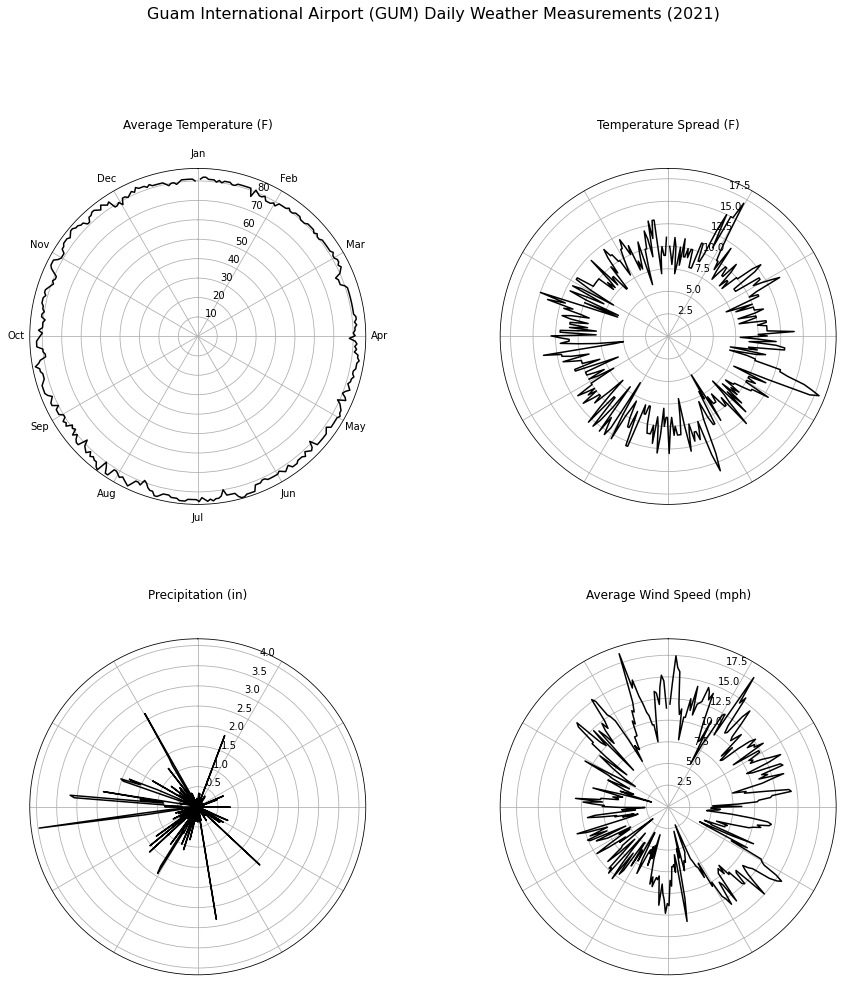

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

theta = df['DAYTHETA']
r_columns = ['TAVG', 'TSPREAD', 'PRCP', 'AWND']
plot_names = ['Average Temperature (F)', 'Temperature Spread (F)', 'Precipitation (in)', 'Average Wind Speed (mph)']

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,
                                             figsize=(14,14),
                                             subplot_kw={'projection': 'polar'})

rs = []
lines = []
for i, ax in enumerate([ax1, ax2, ax3, ax4]):
    r = df[r_columns[i]]
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_thetagrids(range(0, 360, 30), labels=[])
    ax.set_title(plot_names[i], y=1.1)
    line, = ax.plot(theta, r, color='k')
    rs.append(r)
    lines.append(line)

ax1.set_thetagrids(range(0, 360, 30), labels=months)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

def update(num, theta, rs, lines):
    for i, r in enumerate(rs):
        lines[i].set_data(theta[:num], r[:num])
    return lines

ani = animation.FuncAnimation(fig,
                              update,
                              len(theta),
                              fargs=[theta, rs, lines],
                              interval=20,
                              blit=True)
    
sup = fig.suptitle("Guam International Airport (GUM) Daily Weather Measurements (2021)",
                   fontsize=16,
                   y=1.06)

ani.save('weather_measurements.mp4',
         fps=60)